# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Observations:
#Observation #1: Capomulin and Ramicane are both treatments that should be further studied.
#According to the box-plot the final sizes of the tumors were smallest with both Capomulin and Ramicane.
#Capomulin and Ramicane's highest tumor volume are near the lowest of Infubinol and Ceftamin.

#Observation #2: Capomulin's treatment of mouse b128 shows the drug Capomulin is effective with lowering the general size of the tumor
#It began to become effective around day 20, we can see if the effectiveness is averaging during this time or does it relate to the size of the tumor.

#Observation #3: According to the scatter plot, there seems to be a coorelation between the weight and size of tumor for the Capomulin regimen
#There can be more analysis on if this is a coorelation with all regimens. 




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count=combined_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse=combined_df["Mouse ID"].loc[combined_df["Mouse ID"]=="g989"]
type(dupe_mouse)

pandas.core.series.Series

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df= combined_df.loc[combined_df["Mouse ID"]=="g989"]
dupe_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.loc[combined_df["Mouse ID"]!="g989"]


In [6]:
clean_df.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count=clean_df["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_drug=clean_df.groupby("Drug Regimen")
mean_tumor=group_drug["Tumor Volume (mm3)"].mean()
median_tumor=group_drug["Tumor Volume (mm3)"].median()
var_tumor=group_drug["Tumor Volume (mm3)"].var()
std_tumor=group_drug["Tumor Volume (mm3)"].std()
sem_tumor=group_drug["Tumor Volume (mm3)"].sem()


In [9]:
# Assemble the resulting series into a single summary DataFrame
tumor_volume_pd=pd.DataFrame({"Mean Tumor Volume":mean_tumor, 
                              "Median Tumor Volume":median_tumor,
                             "Tumor Volume Variance":var_tumor,
                             "Tumor Volume Std Var":std_tumor,
                             "Tumor Volume Std Err":sem_tumor})
tumor_volume_pd

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Var,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumor_volume_summary=clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
tumor_volume_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints=clean_df["Drug Regimen"].value_counts()
timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:title={'center':'Total Timepoints per Drug Tested'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

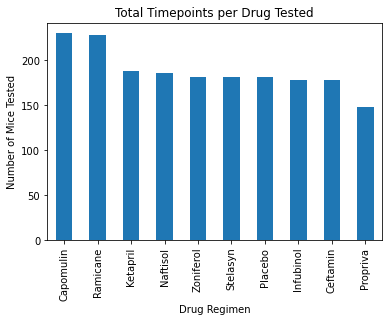

In [12]:
timepoints.plot(kind="bar",xlabel="Drug Regimen",ylabel="Number of Mice Tested",title="Total Timepoints per Drug Tested")

TypeError: 'str' object is not callable

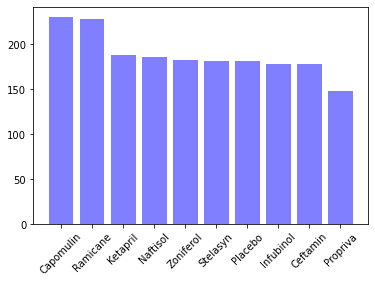

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis=timepoints.index
mice_tested=timepoints


plt.bar(x_axis, mice_tested, color='b', alpha=.5, align="center")
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Timepoints per Drug Tested")
plt.show()

In [14]:
sex_count=clean_df['Sex'].value_counts()
sex_type=sex_count.index
count=sex_count


<AxesSubplot:ylabel='Sex'>

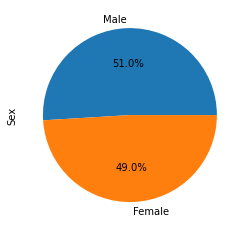

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count.plot.pie(autopct='%1.1f%%')


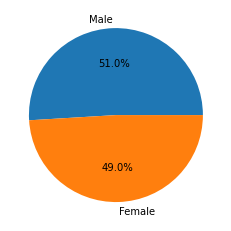

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(count, labels=
        sex_type, autopct="%1.1f%%" )

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mouse=clean_df.groupby(['Mouse ID'])
final_timepoint=grouped_mouse['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_pd=pd.merge(final_timepoint, clean_df, on=['Mouse ID',"Timepoint"], how='left')
final_timepoint_pd

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    print(treatment)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol= final_timepoint_pd.loc[final_timepoint_pd["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    # add subset 
    #tumor_vol_data[treatment]=tumor_vol.to_list()
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    #print(tumor_vol)
tumor_vol_data

Capomulin
Ramicane
Infubinol
Ceftamin


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

TypeError: 'str' object is not callable

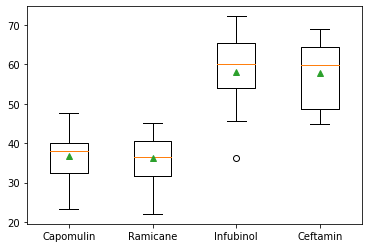

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,labels= treatments, showmeans=True)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatments")
plt.title("Final Tumor Volume with 4 Treatments")
plt.show()


## Line and Scatter Plots

In [20]:
#isolate  capomulin data
capomulin_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [21]:
# pull data for a single mouse b128
capomulin_df.loc[capomulin_df["Mouse ID"]=="b128"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [22]:
cap_b128=capomulin_df.loc[capomulin_df["Mouse ID"]=="b128"]
cap_vol_b128= cap_b128["Tumor Volume (mm3)"]
cap_timepoints_b128=cap_b128["Timepoint"]



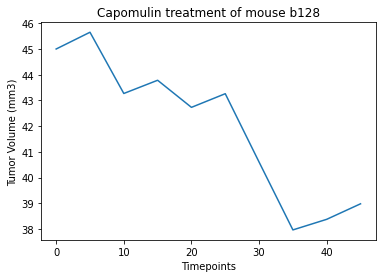

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(cap_timepoints_b128,cap_vol_b128 )
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [25]:
#isolate final timepoints for Capomulin
final_timepoint_cap=final_timepoint_pd.loc[final_timepoint_pd["Drug Regimen"]=="Capomulin"]

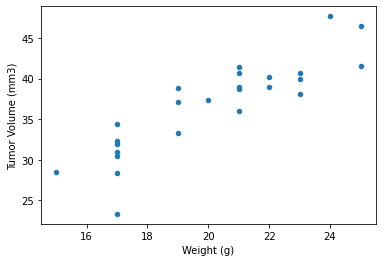

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

final_timepoint_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.xlabel="Weight (g)"
plt.ylabel="Average Tumor Volume (mm3)"
    


In [27]:
#Checking the information that didn't match the reference graph
final_timepoint_cap.loc[final_timepoint_cap["Weight (g)"]==24]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
80,i557,45,47.685963,1,Capomulin,Female,1,24


## Correlation and Regression

In [31]:
xvalues=final_timepoint_cap["Weight (g)"]
yvalues=final_timepoint_cap["Tumor Volume (mm3)"]

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(xvalues,yvalues)
line_values=[]
for x in xvalues:
    line_values.append(x *slope + intercept)


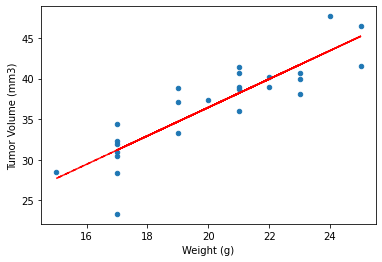

In [42]:
final_timepoint_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.xlabel="Weight (g)"
plt.ylabel="Average Tumor Volume (mm3)"
plt.plot(xvalues,line_values, "--", color="red")